In [76]:
import importlib.util


In [82]:
import os
file = "path_key.json"
if os.path.exists(file):
    print("File found!")
else:
    print("File not found!")

File found!


In [83]:
from google.oauth2 import service_account
from google.cloud import vision

# Authenticate using the service account key
credentials = service_account.Credentials.from_service_account_file(file)

# Initialize the Vision API client with credentials
client = vision.ImageAnnotatorClient(credentials=credentials)

print("Google Vision API client initialized!")



Google Vision API client initialized!


In [84]:
import os
print(os.environ.get("GOOGLE_APPLICATION_CREDENTIALS"))


None


In [85]:
import matplotlib.pyplot as plt
from google.cloud import vision
from google.oauth2 import service_account

# Path to your service account JSON file
credentials_path = "path_key.json"  # Replace with your JSON key file path

# Authenticate using the service account key
credentials = service_account.Credentials.from_service_account_file(credentials_path)

# Initialize the Vision API client with the credentials
client = vision.ImageAnnotatorClient(credentials=credentials)

# Path to the image file
image_path = "ExpediaPic3.jpg"  # Replace with your image file path

# Load the image into memory
with open(image_path, "rb") as image_file:
    content = image_file.read()

# Create an Image object
image = vision.Image(content=content)

# Call the Vision API to detect labels
response = client.label_detection(image=image)
list_imagelabels = []

# Print the detected labels
print("Labels detected in the image:")
for label in response.label_annotations:
    print(f"{label.description}: {label.score:.2f}")
    list_imagelabels = list_imagelabels + [{label.description : 0 }]

list_userslabels = []
users_list = ["beach", "family", "summer", "vacation", "people", "fun"]


for userlabels in users_list:
        list_userslabels.append(userlabels)
      

print("list of user labels", list_userslabels)
print(list_imagelabels)

for label in list_imagelabels:
    count_match = 0
    if label in list_userslabels:
        count_match = count_match + 1
        
        
    else:
        continue
    

        
print("show rank", list_imagelabels[2])
print("here", list)


Labels detected in the image:
Body of water: 0.98
Beach: 0.96
Vacation: 0.96
Fun: 0.95
Leisure: 0.95
Recreation: 0.94
Summer: 0.94
Sea: 0.94
People on beach: 0.92
Coastal and oceanic landforms: 0.90
list of user labels ['beach', 'family', 'summer', 'vacation', 'people', 'fun']
[{'Body of water': 0}, {'Beach': 0}, {'Vacation': 0}, {'Fun': 0}, {'Leisure': 0}, {'Recreation': 0}, {'Summer': 0}, {'Sea': 0}, {'People on beach': 0}, {'Coastal and oceanic landforms': 0}]
show rank {'Vacation': 0}
here <class 'list'>


[]
Labels detected in the image:
Match found: vacation
Match found: fun
[]
Labels detected in the image:
Match found: vacation
[]
Labels detected in the image:
Match found: beach
Match found: vacation
Match found: fun
Match found: summer


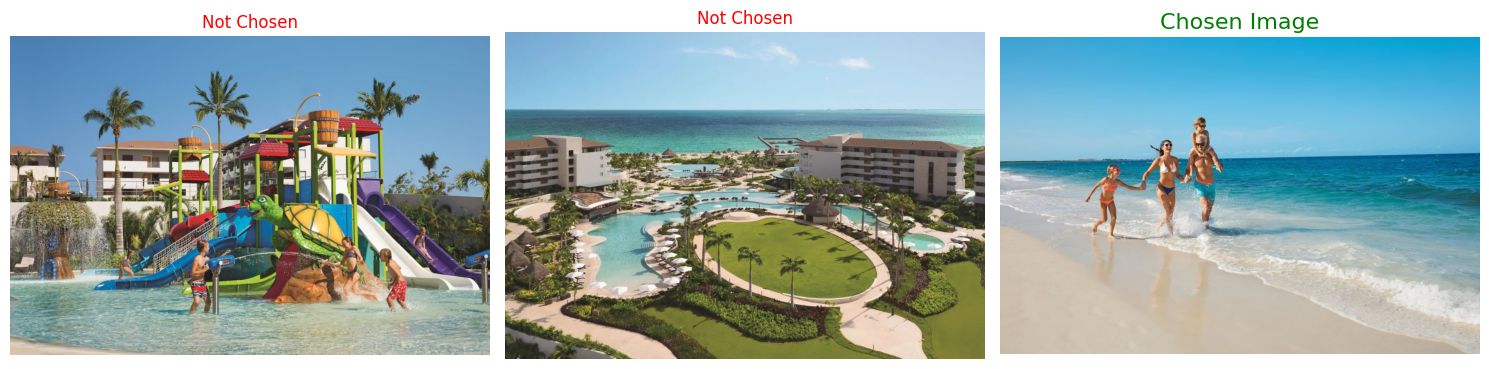

In [86]:
from google.cloud import vision
from google.oauth2 import service_account

# Path to your service account JSON file
credentials_path = "path_key.json"  # Replace with your JSON key file path

# Authenticate using the service account key
credentials = service_account.Credentials.from_service_account_file(credentials_path)

# Initialize the Vision API client with the credentials
client = vision.ImageAnnotatorClient(credentials=credentials)

# List of sample hotel images
hotel_images_dic = [{"ExpediaPic1.jpg" : 0}, {"ExpediaPic2.jpg": 0}, {"ExpediaPic3.jpg":0}]
hotel_images = ["ExpediaPic1.jpg", "ExpediaPic2.jpg", "ExpediaPic3.jpg"]
hotel_images_clean = ["ExpediaPic1.jpg", "ExpediaPic2.jpg", "ExpediaPic3.jpg"]
# Store results
results = []

dic_images = []

# Analyze images and extract labels
for image_path in hotel_images:
    with open(image_path, "rb") as image_file:
        content = image_file.read()
    image = vision.Image(content=content)
    response = client.label_detection(image=image)

    print(dic_images)
    list_imagelabels = []
    
    # Print the detected labels
    print("Labels detected in the image:")
    for label in response.label_annotations:
        label_description = label.description.lower()
        list_imagelabels = list_imagelabels + [{label_description : 0 }]
    
    list_userslabels = []
    users_list = ["beach", "family", "summer", "vacation", "people", "fun"]
    
    
    for userlabels in users_list:
            list_userslabels.append(userlabels)
    
    
    for label in list_imagelabels:
        for label_description in label:
            if label_description in list_userslabels:
                print(f"Match found: {label_description}")
                for dic in hotel_images_dic:
                    if image_path in dic:
                        dic[image_path] += 1

#Find image with the highest score
best_image = max(hotel_images_dic, key=lambda x: list(x.values())[0])

#Display all images and highlight the best one
fig, axes = plt.subplots(1, len(hotel_images), figsize=(15,5))
for idx, image_path in enumerate(hotel_images):
    #Load image
    img = plt.imread(image_path)
    axes[idx].imshow(img)
    axes[idx].axis('off')
    # Highlight the best matching image
    if image_path in best_image:
        axes[idx].set_title("Chosen Image", color="green", fontsize=16)
    else:
        axes[idx].set_title("Not Chosen", color="red", fontsize=12)

plt.tight_layout()
plt.show()
